In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
data = pd.read_csv("../data/UCF-crime-frames-descriptions-partitions.csv")

In [3]:
video_name = [f.split("_")[0] for f in data["frame"]]

In [4]:
data["vn"] = video_name

In [5]:
model = nn.Sequential(
    nn.Linear(4736, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 10)
)

In [6]:
model.load_state_dict(torch.load("models/model_image_all_features.pt"))

<All keys matched successfully>

In [7]:
final = nn.Sequential(model, torch.nn.Softmax(dim = 1))

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
final.to(device)

Sequential(
  (0): Sequential(
    (0): Linear(in_features=4736, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=1024, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=1024, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=256, out_features=10, bias=True)
  )
  (1): Softmax(dim=1)
)

In [11]:
utils.labels

{'Normal': 0,
 'Abuse': 1,
 'Arrest': 2,
 'Arson': 3,
 'Burglary': 4,
 'Explosion': 5,
 'Fighting': 6,
 'RoadAccidents': 7,
 'Shooting': 8,
 'Vandalism': 9}

In [20]:
path = "d:/data/UCF-crime/Anomaly-Videos-frames-features"
path_q = "d:/data/UCF-crime/Anomaly-Videos-qformer-features"
path_d = "d:/data/UCF-crime/Anomaly-Videos-description-features-mean"

In [13]:
video = data.loc[data["vn"] == "Vandalism046"]
print(video["partition"].head(1))

145556    test
Name: partition, dtype: object


In [21]:
video_feat, y = utils.get_data(video, path, n=1408)
video_feat_q, _ = utils.get_data(video, path_q, n=768)
video_feat_d, _ = utils.get_data(video, path_d, n=2560)
video_feat = torch.concatenate([video_feat, video_feat_q, video_feat_d], axis=1)

In [22]:
batch_size = 64
pred = utils.evaluate(video_feat, final, device, batch_size)

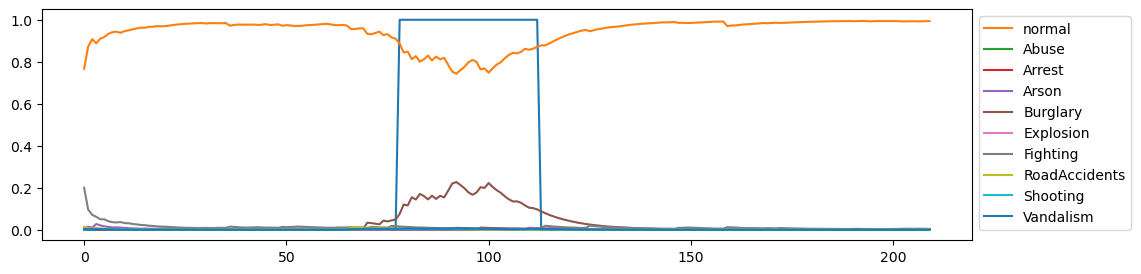

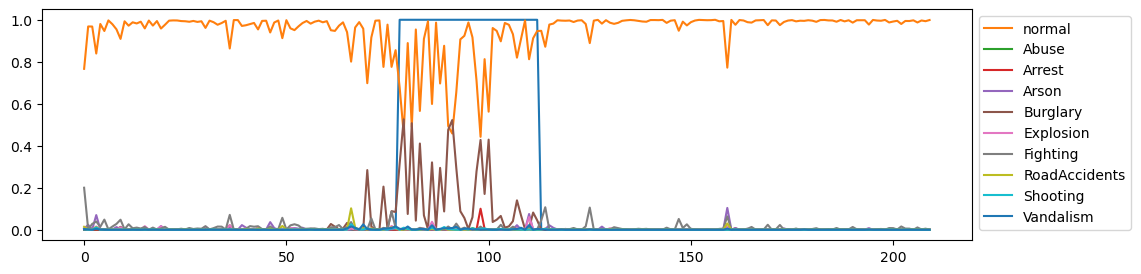

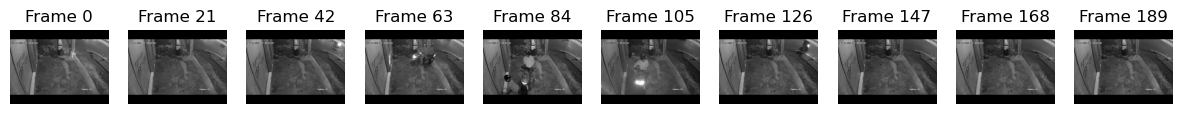

In [24]:
utils.plot_results(y/9, utils.put_momentum(pred))
utils.plot_results(y/9, pred)
utils.show_frames(video, n=10)

In [25]:
video = data.loc[data["vn"] == "Abuse046"]
print(video["partition"].head(1))

18057    test
Name: partition, dtype: object


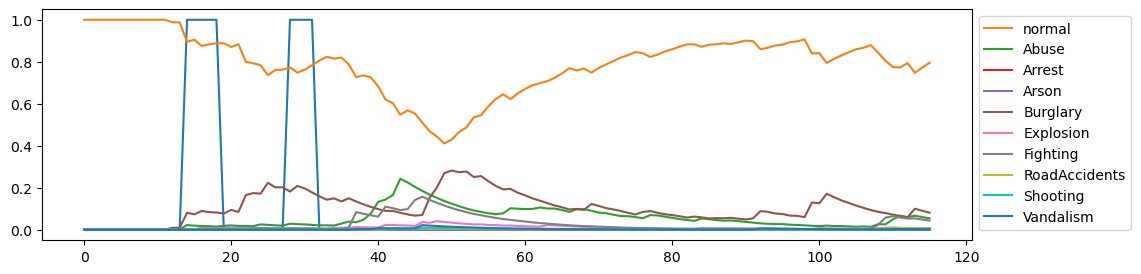

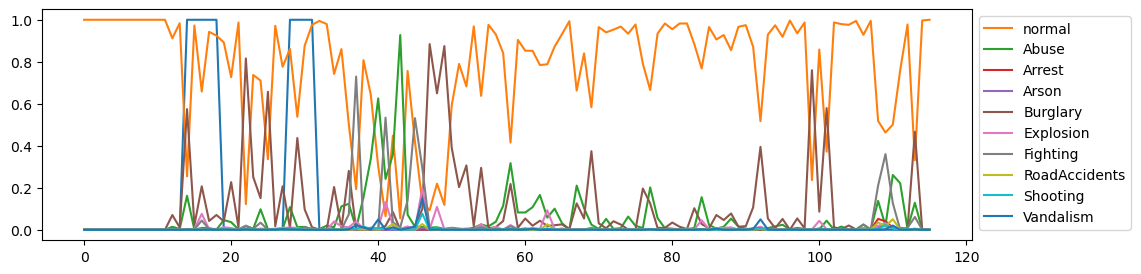

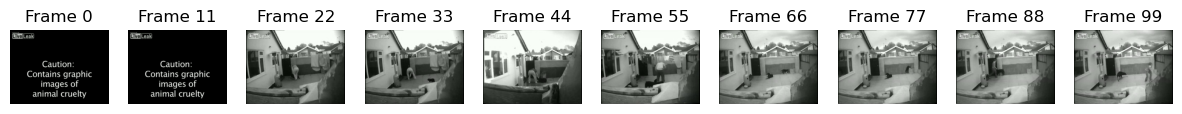

In [26]:
video_feat, y = utils.get_data(video, path, n=1408)
video_feat_q, _ = utils.get_data(video, path_q, n=768)
video_feat_d, _ = utils.get_data(video, path_d, n=2560)
video_feat = torch.concatenate([video_feat, video_feat_q, video_feat_d], axis=1)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y/1, utils.put_momentum(pred))
utils.plot_results(y/1, pred)
utils.show_frames(video, n=10)

In [27]:
video = data.loc[data["vn"] == "Arrest044"]
print(video["partition"].head(1))

46824    validation
Name: partition, dtype: object


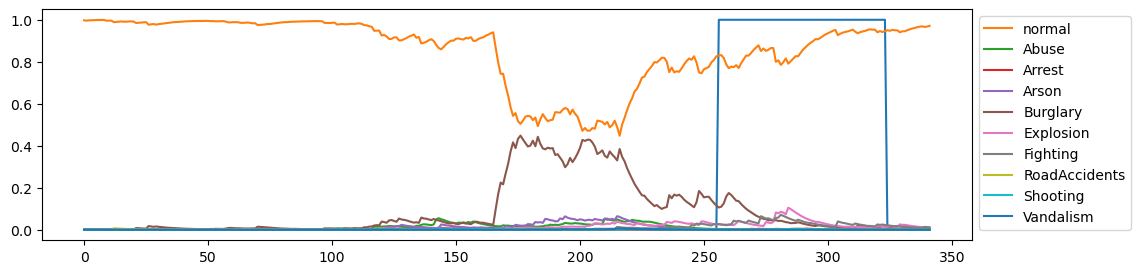

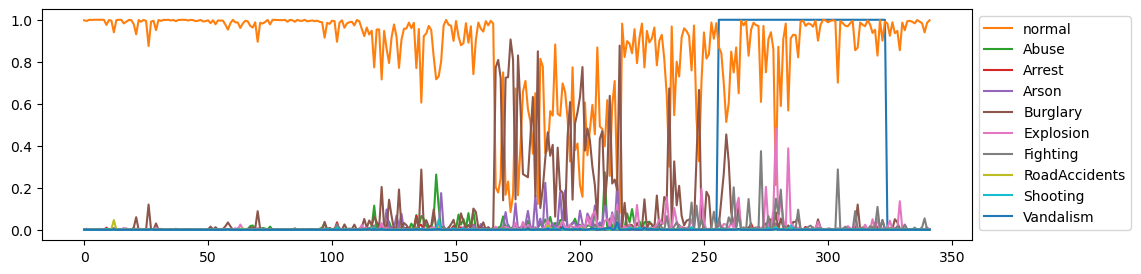

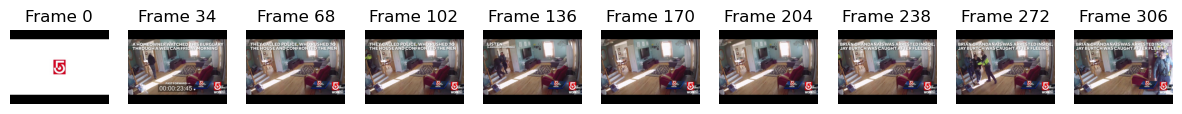

In [28]:
video_feat, y = utils.get_data(video, path, n=1408)
video_feat_q, _ = utils.get_data(video, path_q, n=768)
video_feat_d, _ = utils.get_data(video, path_d, n=2560)
video_feat = torch.concatenate([video_feat, video_feat_q, video_feat_d], axis=1)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y/2, utils.put_momentum(pred))
utils.plot_results(y/2, pred)
utils.show_frames(video, n=10)

In [29]:
video = data.loc[data["vn"] == "Fighting044"]
print(video["partition"].head(1))

167440    validation
Name: partition, dtype: object


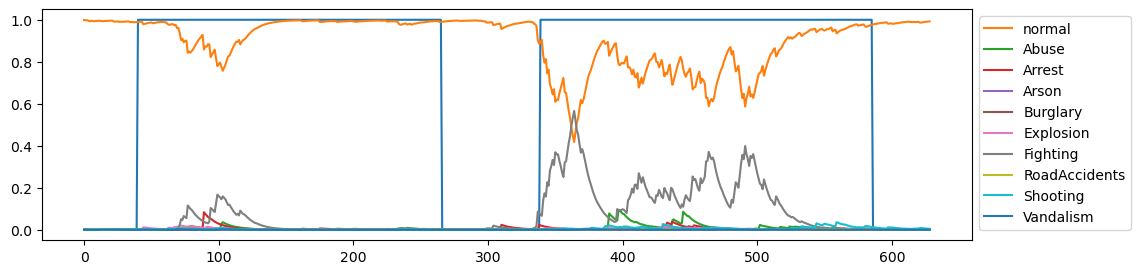

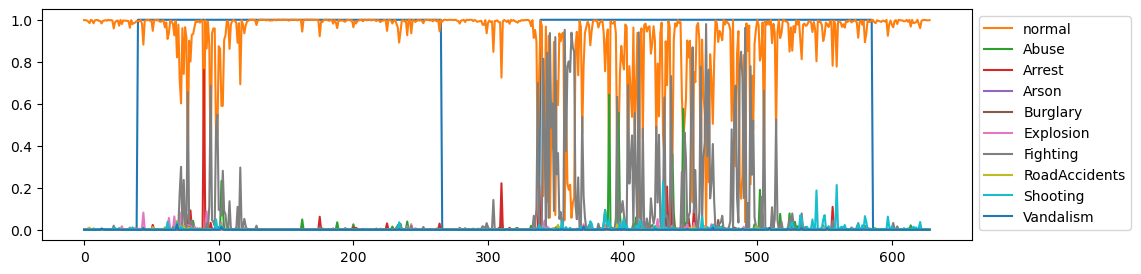

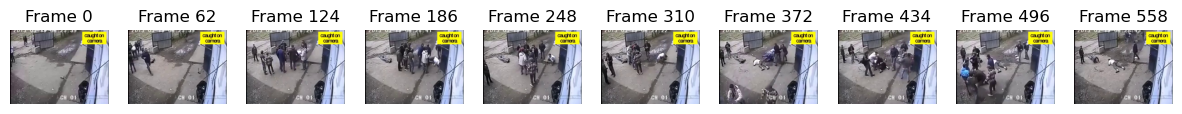

In [30]:
video_feat, y = utils.get_data(video, path, n=1408)
video_feat_q, _ = utils.get_data(video, path_q, n=768)
video_feat_d, _ = utils.get_data(video, path_d, n=2560)
video_feat = torch.concatenate([video_feat, video_feat_q, video_feat_d], axis=1)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y/6, utils.put_momentum(pred))
utils.plot_results(y/6, pred)
utils.show_frames(video, n=10)